In [20]:
# !pip install torchsummary
# !pip install torchvision
import torch
import torch.nn as nn
from torch.nn import Conv2d
import torchvision as tv

# Методы

In [37]:
# Преобразует цветное изобр. в ЧБ; num_output_channels - сколько каналов должно быть в итоговом изображении
tv.transforms.Grayscale(num_output_channels=3)

# Пайплайн для трансформаций изображений.
transoforms = tv.transforms.Compose([
    tv.transforms.Grayscale(3),
    tv.transforms.Resize((224, 224)),
    tv.transforms.ToTensor()
])

# загрузка датасетов
train_dataset = tv.datasets.MNIST('.', train=True, transform=transoforms, download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=transoforms, download=True)

# создание даталоадеров
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=4)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=4)
for i in test_iter:
    print(i[0].shape)  # torch.Size([4, 3, 224, 224])
    break

# LeNet 

In [2]:
conv2d = Conv2d

In [3]:
model = nn.Sequential(
    # C1 (1@32×32 → 6@28×28 → 6@14×14)
    nn.Conv2d(1, 6, 5),  # 6*(5*5) + 6 = 156
    nn.Tanh(),
    nn.AvgPool2d(2, 2),

    # C3 (6@14×14 → 16@10×10 → 16@5×5)
    nn.Conv2d(6, 16, 5),  # 16(фильтров) * (глубиной)6 * 25(с парам.ядра) + 16(св.весов) = 2416
    nn.Tanh(),
    nn.AvgPool2d(2, 2),

	# C5 записанный в виде полносвязного слоя вместо свертки
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.Tanh(),
    
    nn.Linear(120, 84),
    nn.Tanh(),
    nn.Linear(84, 10)
)

In [4]:
from torchsummary import summary

In [5]:
summary(model, input_size=(1,32,32), device='cuda')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
              Tanh-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             Tanh-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

# AlexNet

In [6]:
from torchvision.models import alexnet

In [7]:
X = torch.rand(1,3,224,224)
X.shape

torch.Size([1, 3, 224, 224])

In [8]:
model = alexnet()
for l in model.features:
    print(l)
    X = l(X)
    print(X.shape)
    print('='*40)

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
torch.Size([1, 64, 55, 55])
ReLU(inplace=True)
torch.Size([1, 64, 55, 55])
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
torch.Size([1, 64, 27, 27])
Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
torch.Size([1, 192, 27, 27])
ReLU(inplace=True)
torch.Size([1, 192, 27, 27])
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
torch.Size([1, 192, 13, 13])
Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([1, 384, 13, 13])
ReLU(inplace=True)
torch.Size([1, 384, 13, 13])
Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([1, 256, 13, 13])
ReLU(inplace=True)
torch.Size([1, 256, 13, 13])
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([1, 256, 13, 13])
ReLU(inplace=True)
torch.Size([1, 256, 13, 13])
MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=Fals

In [9]:
X = model.avgpool(X) # если входное изобр. не 224х224
X = torch.flatten(X, 1)
for l in model.classifier:
    X = l(X)
    print(X.shape)

torch.Size([1, 9216])
torch.Size([1, 4096])
torch.Size([1, 4096])
torch.Size([1, 4096])
torch.Size([1, 4096])
torch.Size([1, 4096])
torch.Size([1, 1000])


# Torch | cv2 | PIL | convertations

In [21]:
import torchvision.transforms as T
from torchvision.transforms.functional import to_tensor

import numpy as np
import cv2 
from PIL import Image

In [22]:
cv_img_bgr = cv2.imread('jinx.jpg')
cv_img_rgb = cv2.cvtColor(cv_img_bgr, cv2.COLOR_BGR2RGB)
cv_img_rgb.shape

(2160, 3840, 3)

In [23]:
def rgb_array_to_tensor1(rgb: np.ndarray) -> torch.Tensor:
    # H, W, C -> C, H, W
    tensor = torch.from_numpy(rgb).permute(2, 0, 1).float()
    # Нормализуем и добавляем батч
    return (tensor / 255.0).unsqueeze(0) 

In [24]:
rgb_array_to_tensor1(cv_img_rgb).shape

torch.Size([1, 3, 2160, 3840])

In [25]:
i1 = rgb_array_to_tensor1(cv_img_rgb)

In [26]:
def rgb_array_to_tensor2(rgb: np.ndarray) -> torch.Tensor:
    """
    Преобразует RGB-изображение из numpy-массива в тензор PyTorch
    H,W,C -> C,H,W, нормализация к [0,1], добавление batch.
    """
    # permute + float + /255
    tensor = to_tensor(rgb)  # -> [С, H, W]
    # Добавляем batch dimension
    return tensor.unsqueeze(0)  # -> [1, С, H, W]

In [27]:
rgb_array_to_tensor2(cv_img_rgb).shape

torch.Size([1, 3, 2160, 3840])

In [28]:
i2 = rgb_array_to_tensor2(cv_img_rgb)

In [29]:
(i1 == i2).all()

tensor(True)

In [30]:
def tensor_to_rgb_array(tensor: torch.Tensor) -> np.ndarray:
    
    if tensor.ndim == 4:
        tensor = tensor.squeeze(0)
    if tensor.ndim != 3 or tensor.shape[0] != 3:
        raise ValueError(f"Ожидается [3, H, W], получено: {tensor.shape}")

    tensor = tensor.mul(255.0)
    tensor = torch.clamp(tensor, 0, 255)
    tensor = tensor.to(torch.uint8)
    tensor = tensor.permute(1, 2, 0) # C,H,W -> H,W,C (RGB)
    return tensor.numpy()

In [31]:
pool = nn.AvgPool2d(kernel_size=11)

In [32]:
pooled_img = pool(i2)

In [33]:
pooled_img.shape

torch.Size([1, 3, 196, 349])

In [34]:
out_img = tensor_to_rgb_array(pooled_img)

In [35]:
# Image.fromarray(out_img).show()

# torchvision.transforms.Resize

In [67]:
"""
Принимает на вход PIL или Tensor
После трансформации:
PIL возвращает <class 'PIL.Image.Image'> (224, 224)
Tensor возвращает <class 'torch.Tensor'> torch.Size([3, 224, 224])
""";

In [48]:
from torchvision import transforms

transform = transforms.Resize((224, 224))

(3840, 2160)
<class 'PIL.Image.Image'> (224, 224)


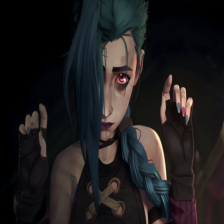

In [62]:
# PIL
pil_img = Image.open('jinx.jpg')
print(pil_img.size)
pil_img_transformed = transform(pil_img)
print(type(pil_img_transformed), pil_img_transformed.size)
pil_img_transformed

torch.Size([3, 2160, 3840])
<class 'torch.Tensor'> torch.Size([3, 224, 224])


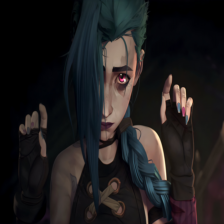

In [63]:
# torch.Tensor
to_tensor = tv.transforms.ToTensor()
tensor_img = to_tensor(Image.open('jinx.jpg'))
print(tensor_img.shape)
tensor_img_transformed = transform(tensor_img)
print(type(tensor_img_transformed), tensor_img_transformed.shape)
Image.fromarray(tensor_to_rgb_array(tensor_img_transformed))